![image info](https://ineuron.ai/images/ineuron-logo.png)

![image_info](https://images.pexels.com/photos/51951/forest-fire-fire-smoke-conservation-51951.jpeg?cs=srgb&dl=pexels-pixabay-51951.jpg)

# <span style="color:Cyan"> 1. Import Data and Required Packages<span>

In [140]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, recall_score,precision_score,f1_score


In [2]:
# download_url=https://archive.ics.uci.edu/ml/machine-learning-databases/00547/
df=pd.read_csv(r"C:\Users\soume\task_eda\Algerian_Data\Algerian_forest_fires_dataset_UPDATE.csv",header=1)

# <span style="color:Cyan">Show Top 5 Records<span>

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


# <span style="color:Cyan">Show Last 5 Records<span>

In [4]:
df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire
245,30,09,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire


## <span style="color:Cyan">Shape of the dataset<span>

In [5]:
df.shape

(246, 14)

## <span style="color:Cyan">Check types of dataset<span>

In [6]:
df.dtypes

day            object
month          object
year           object
Temperature    object
 RH            object
 Ws            object
Rain           object
FFMC           object
DMC            object
DC             object
ISI            object
BUI            object
FWI            object
Classes        object
dtype: object

# <span style="color:Cyan">Summary of dataset<span>

In [7]:
df.describe(include="all")

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
count,246,245,245,245,245,245,245,245,245,245,245,245,245,244
unique,33,5,2,20,63,19,40,174,167,199,107,175,128,9
top,01,07,2012,35,64,14,0,88.9,7.9,8,1.1,3,0.4,fire
freq,8,62,244,29,10,43,133,8,5,5,8,5,12,131


## <span style="color:Cyan">Checking the types of the features<span>
    

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


## <span style="color:Cyan"> Removing some row which haven't make any sense <span>

In [9]:

df.drop([122,123],inplace=True)
df.reset_index(inplace=True)
df.drop('index',axis=1,inplace=True)

## <span style="color:Cyan">Setting the region for dataset<span>

In [10]:
df.loc[:126, 'region'] = 'bejaia'
df.loc[126:, 'region'] = 'Sidi-Bel Abbes'


## <span style="color:Cyan">Checking sample<span>

In [11]:
df.sample(7)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
21,22,06,2012,31,67,17,0.1,79.1,7,39.5,2.4,9.7,2.3,not fire,bejaia
208,26,08,2012,33,37,16,0,92.2,61.3,167.2,13.1,64,30.3,fire,Sidi-Bel Abbes
91,31,08,2012,28,80,21,16.8,52.5,8.7,8.7,0.6,8.3,0.3,not fire,bejaia
36,07,07,2012,35,64,18,0.2,80,9.7,40.4,2.8,12.1,3.2,not fire,bejaia
200,18,08,2012,37,37,14,0,94.3,35.9,86.8,16,35.9,26.3,fire,Sidi-Bel Abbes
116,25,09,2012,26,81,21,5.8,48.6,3,7.7,0.4,3,0.1,not fire,bejaia
75,15,08,2012,36,55,13,0.3,82.4,15.6,92.5,3.7,22,6.3,fire,bejaia


### <span style="color:Cyan"> Stripping the Classes Features data and Unique value of class feature<span>

In [12]:


df.columns = [i.strip() for i in df.columns]
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'region'],
      dtype='object')

In [13]:
df.Classes = df.Classes.str.strip()
df['Classes'].unique()

array(['not fire', 'fire', nan], dtype=object)

## <span style="color:Cyan">Chaniging the data types<span>


In [14]:
df['day']=df['day'].astype(int)
df['month']=df['month'].astype(int)
df['year']=df['year'].astype(int)
df['Temperature']=df['Temperature'].astype(int)
df['RH']=df['RH'].astype(int)
df['Rain']=df['Rain'].astype(float)
df['FFMC']=df['FFMC'].astype(float)
df['DMC']=df['DMC'].astype(float)
df['BUI']=df['BUI'].astype(float)
df['ISI']=df['ISI'].astype(float)
df['Ws']=df['Ws'].astype(float)



df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int32  
 1   month        244 non-null    int32  
 2   year         244 non-null    int32  
 3   Temperature  244 non-null    int32  
 4   RH           244 non-null    int32  
 5   Ws           244 non-null    float64
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    object 
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    object 
 14  region       244 non-null    object 
dtypes: float64(6), int32(5), object(4)
memory usage: 24.0+ KB


## <span style="color:Cyan">Checking Null Value<span>


In [15]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
region         0
dtype: int64

In [16]:
df['Classes'].unique()

array(['not fire', 'fire', nan], dtype=object)

## <span style="color:Cyan">Fill the null value of categorical variable by mode<span>


In [17]:
df['Classes'].mode()
df["Classes"].fillna('fire',inplace=True)
df['Classes'].unique()

array(['not fire', 'fire'], dtype=object)

## <span style="color:Cyan">checking the data type again after type casting<span>

In [18]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int32  
 1   month        244 non-null    int32  
 2   year         244 non-null    int32  
 3   Temperature  244 non-null    int32  
 4   RH           244 non-null    int32  
 5   Ws           244 non-null    float64
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    object 
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    object 
 13  Classes      244 non-null    object 
 14  region       244 non-null    object 
dtypes: float64(6), int32(5), object(4)
memory usage: 24.0+ KB


## <span style="color:Cyan">Making the dependent feature to use logistic classification<span>

In [19]:
df['Classes']=df['Classes'].map({'not fire':0,'fire':1})
df.sample(5)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
139,18,6,2012,33,62,10.0,8.7,65.5,4.6,8.3,0.9,4.4,0.4,0,Sidi-Bel Abbes
60,31,7,2012,35,64,17.0,0.0,87.2,31.9,145.7,6.8,41.2,15.7,1,bejaia
227,14,9,2012,28,81,15.0,0.0,84.6,12.6,41.5,4.3,14.3,5.7,1,Sidi-Bel Abbes
98,7,9,2012,31,71,17.0,0.3,69.6,3.2,30.1,1.5,5.1,0.6,0,bejaia
197,15,8,2012,35,46,13.0,0.3,83.9,16.9,54.2,3.5,19.0,5.5,1,Sidi-Bel Abbes


In [20]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,2012,29,57,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,bejaia
1,2,6,2012,29,61,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,bejaia
2,3,6,2012,26,82,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,bejaia
3,4,6,2012,25,89,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0,0,bejaia
4,5,6,2012,27,77,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,bejaia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,2012,30,65,14.0,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,Sidi-Bel Abbes
240,27,9,2012,28,87,15.0,4.4,41.1,6.5,8,0.1,6.2,0,0,Sidi-Bel Abbes
241,28,9,2012,27,87,29.0,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,Sidi-Bel Abbes
242,29,9,2012,24,54,18.0,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,Sidi-Bel Abbes


In [21]:
# Shape of the data 

df.shape

(244, 15)

In [22]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,2012,29,57,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,bejaia
1,2,6,2012,29,61,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,bejaia
2,3,6,2012,26,82,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,bejaia
3,4,6,2012,25,89,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0,0,bejaia
4,5,6,2012,27,77,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,bejaia


## <span style="color:Cyan">Making new copy of original data<span>

In [23]:
new_df=df.copy()

In [24]:
new_df.drop(['day','month','year'],axis=1,inplace=True)

In [25]:
new_df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,29,57,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,bejaia
1,29,61,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,bejaia
2,26,82,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,bejaia
3,25,89,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0,0,bejaia
4,27,77,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,bejaia
...,...,...,...,...,...,...,...,...,...,...,...,...
239,30,65,14.0,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,Sidi-Bel Abbes
240,28,87,15.0,4.4,41.1,6.5,8,0.1,6.2,0,0,Sidi-Bel Abbes
241,27,87,29.0,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,Sidi-Bel Abbes
242,24,54,18.0,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,Sidi-Bel Abbes


## <span style="color:Cyan">Checking the new data<span>

In [26]:
new_df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,29,57,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,bejaia
1,29,61,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,bejaia
2,26,82,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,bejaia
3,25,89,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0,0,bejaia
4,27,77,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,bejaia
...,...,...,...,...,...,...,...,...,...,...,...,...
239,30,65,14.0,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,Sidi-Bel Abbes
240,28,87,15.0,4.4,41.1,6.5,8,0.1,6.2,0,0,Sidi-Bel Abbes
241,27,87,29.0,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,Sidi-Bel Abbes
242,24,54,18.0,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,Sidi-Bel Abbes


In [27]:
# from pandas_profiling import ProfileReport
# prof = ProfileReport(new_df)
# prof.to_file(output_file='Algerian_EDA.html')

## <span style="color:Cyan">Exploring Data<span>

In [28]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 12 numerical features : ['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'ISI', 'BUI', 'Classes']

We have 3 categorical features : ['DC', 'FWI', 'region']


In [29]:
new_df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,29,57,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,bejaia
1,29,61,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,bejaia
2,26,82,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,bejaia
3,25,89,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0,0,bejaia
4,27,77,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,bejaia
...,...,...,...,...,...,...,...,...,...,...,...,...
239,30,65,14.0,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,Sidi-Bel Abbes
240,28,87,15.0,4.4,41.1,6.5,8,0.1,6.2,0,0,Sidi-Bel Abbes
241,27,87,29.0,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,Sidi-Bel Abbes
242,24,54,18.0,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,Sidi-Bel Abbes


In [30]:
# define numerical & categorical columns
numeric_features = [feature for feature in new_df.columns if new_df[feature].dtype != 'O']
categorical_features = [feature for feature in new_df.columns if new_df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 9 numerical features : ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'ISI', 'BUI', 'Classes']

We have 3 categorical features : ['DC', 'FWI', 'region']


## <span style="color:Cyan">Feature Information<span>

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
 Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8
FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely â€œFireâ€ and â€œnot Fireâ€



## <span style="color:Cyan">Univariate Analysis<span>

* The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable.

## <span style="color:Cyan">EDA of Numeric Features<span>

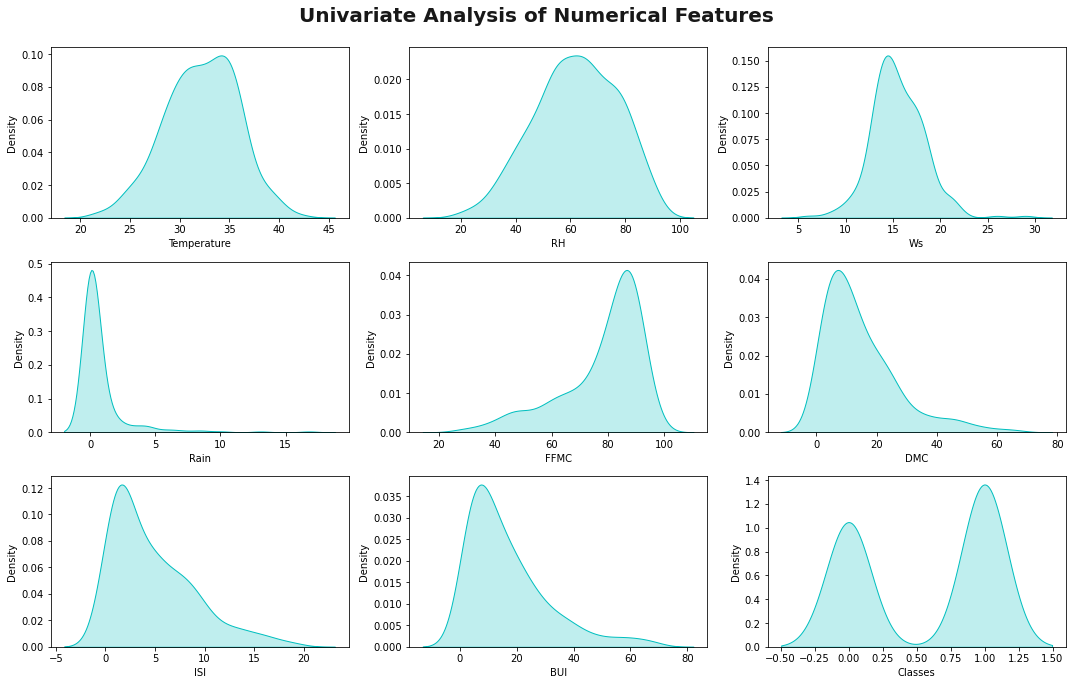

In [31]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.9, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=new_df[numeric_features[i]],shade=True,color="c")
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

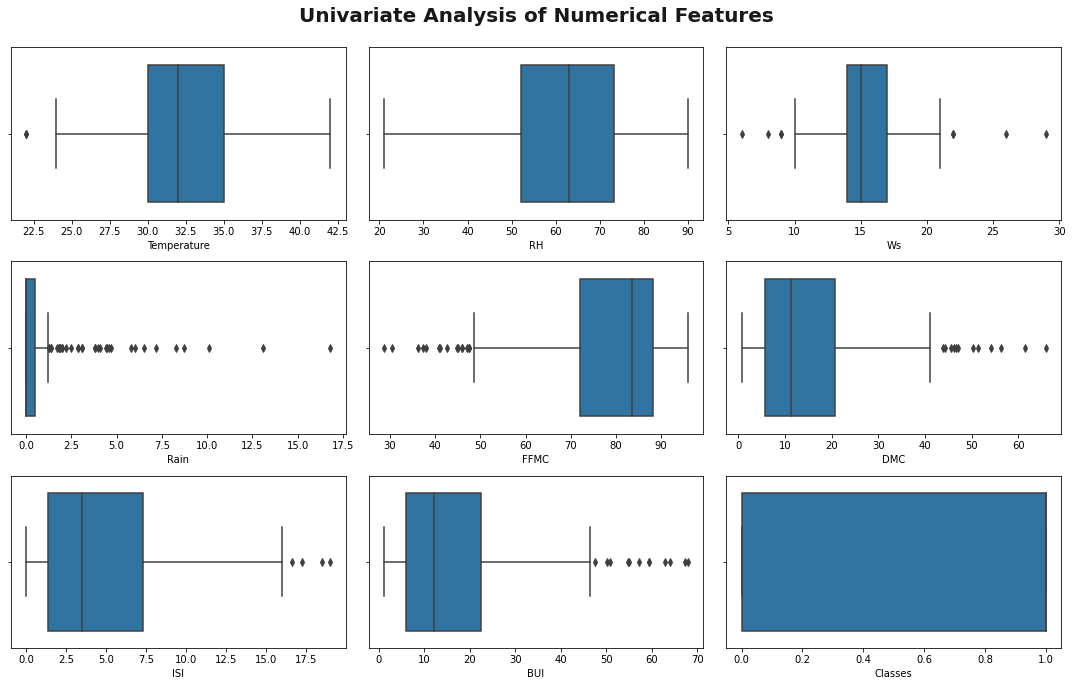

In [32]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.9, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.boxplot(x=new_df[numeric_features[i]])
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

## <span style="color:Cyan">EDA of Categorical Features<span>

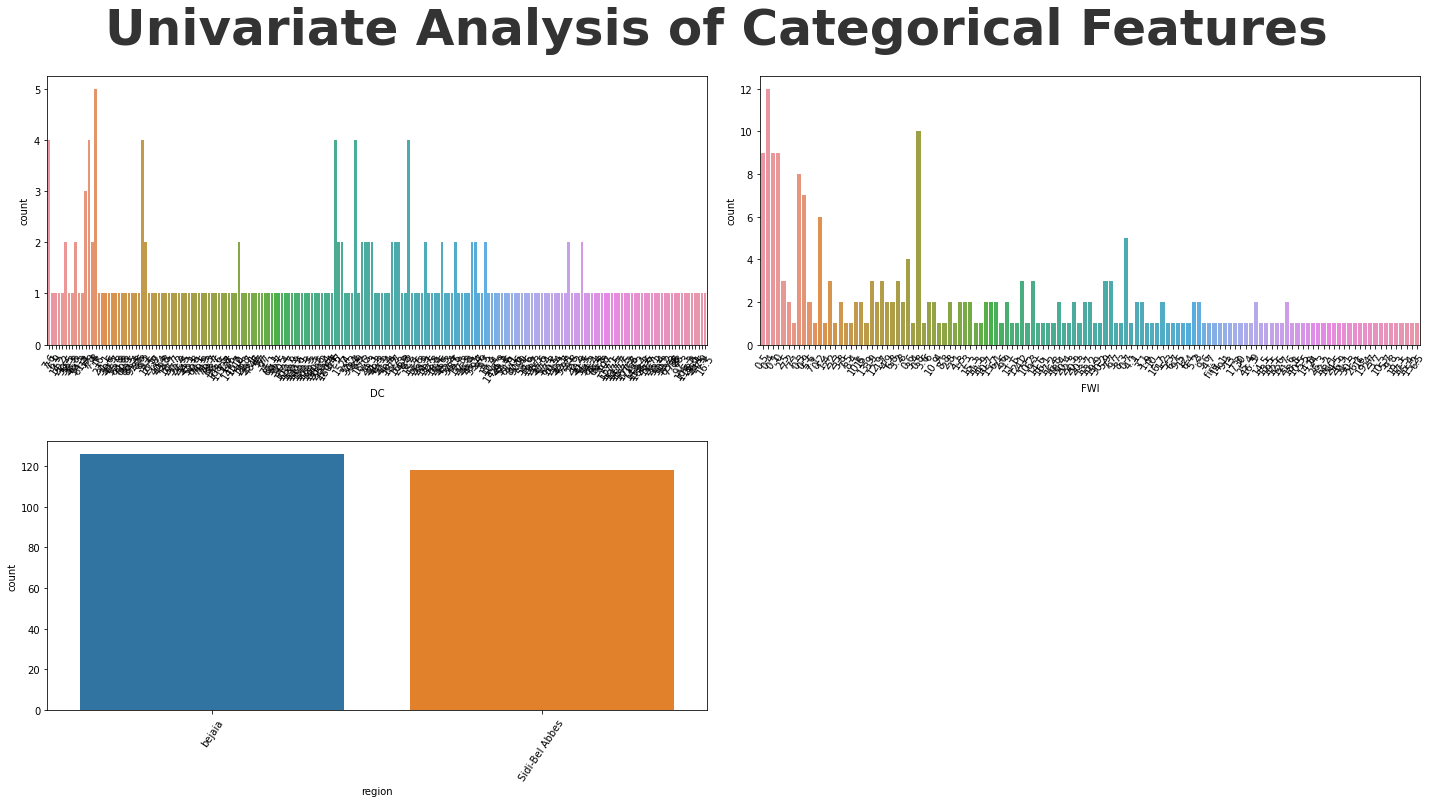

In [33]:
# categorical columns
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=50, fontweight='bold', alpha=0.8, y=1.)
for i in range(0, len(categorical_features)):
    plt.subplot(3, 2, i+1)
    sns.countplot(x=new_df[categorical_features[i]])
    plt.xlabel(categorical_features[i])
    plt.xticks(rotation=56)
    plt.tight_layout()


# <span style="color:Cyan">Statistical Analysis<span>

## <span style="color:Cyan">Checking correlation<span>

In [34]:
new_df.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,BUI,Classes
Temperature,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.607551,0.455504,0.518119
RH,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.690637,-0.348587,-0.435023
Ws,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.015248,0.029756,-0.066529
Rain,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.347105,-0.299171,-0.379449
FFMC,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.739730,0.589652,0.770114
DMC,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.674499,0.982073,0.584188
ISI,0.607551,-0.690637,0.015248,-0.347105,0.739730,0.674499,1.000000,0.635891,0.735511
BUI,0.455504,-0.348587,0.029756,-0.299171,0.589652,0.982073,0.635891,1.000000,0.583882
Classes,0.518119,-0.435023,-0.066529,-0.379449,0.770114,0.584188,0.735511,0.583882,1.000000


## <span style="color:Cyan">Bivariate Analysis<span>

### <span style="color:Cyan">Comparing the fire of two region<span>

<AxesSubplot:xlabel='region', ylabel='Classes'>

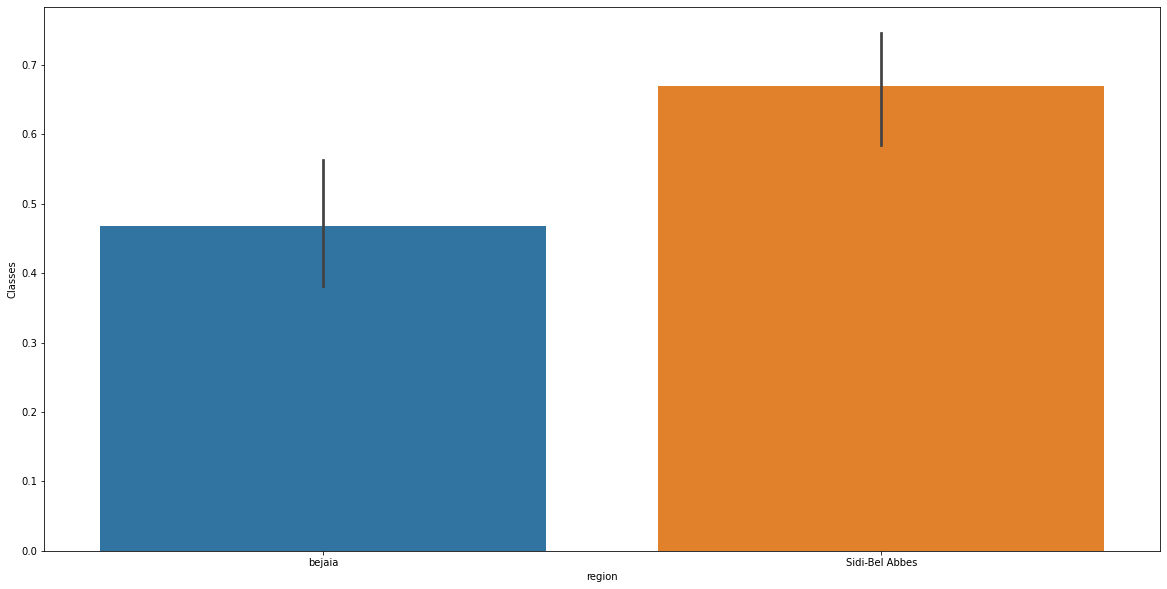

In [35]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)
sns.barplot(x="region",y="Classes",data=new_df)

### <span style="color:Cyan">Maximum temperaure & Minimum temperaure<span> 

In [36]:
print(new_df['Temperature'].max())
print(new_df['Temperature'].min())

42
22


### <span style="color:Cyan">Comparing Rain's of two region<span> 

<AxesSubplot:xlabel='region', ylabel='Rain'>

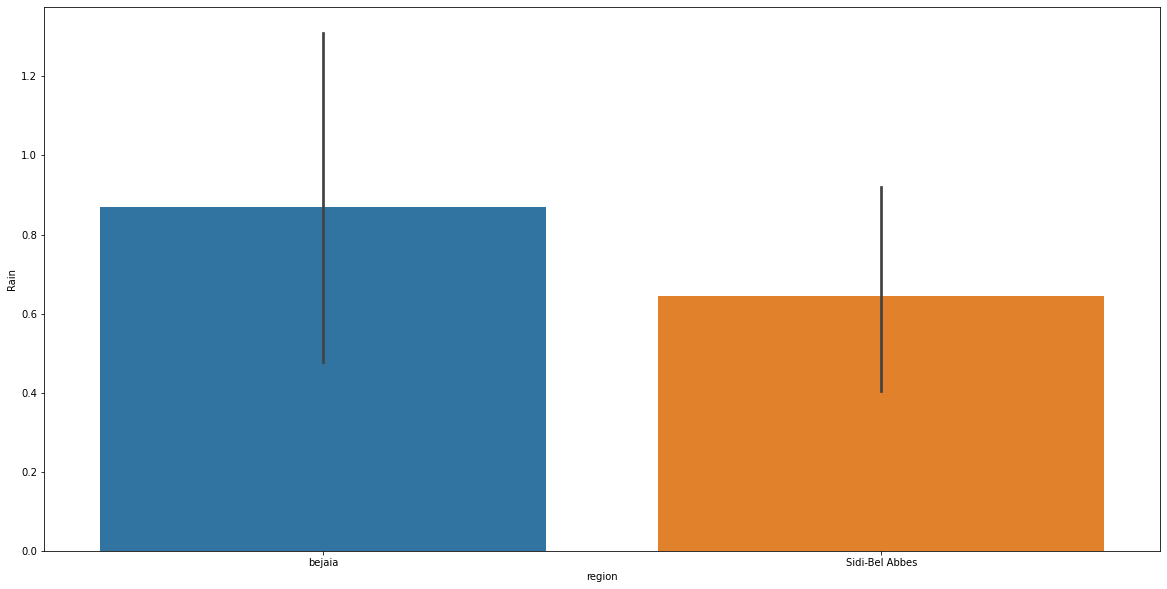

In [37]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)

sns.barplot(x="region",y="Rain",data=new_df)

### <span style="color:Cyan">Checking correlation with Target feature<span> 

In [38]:
df1=pd.DataFrame(new_df.corr()["Classes"][0:7])
df1

,Classes
Temperature,0.518119
RH,-0.435023
Ws,-0.066529
Rain,-0.379449
FFMC,0.770114
DMC,0.584188
ISI,0.735511


### <span style="color:Cyan">Multivariate Analysis<span> 

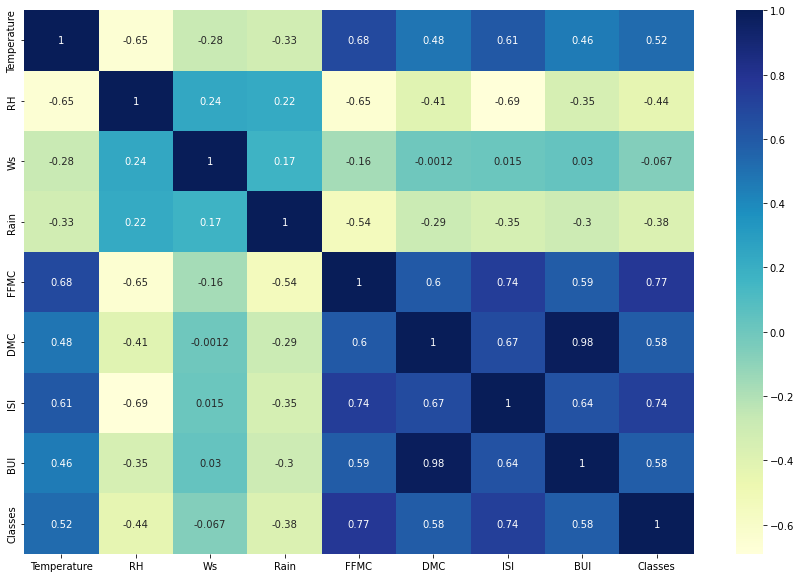

In [39]:
plt.figure(figsize=(15,10))
sns.heatmap(new_df.corr(),annot=True, cmap="YlGnBu")
plt.show()

### <span style="color:Cyan">Checking the outliers<span> 

<AxesSubplot:>

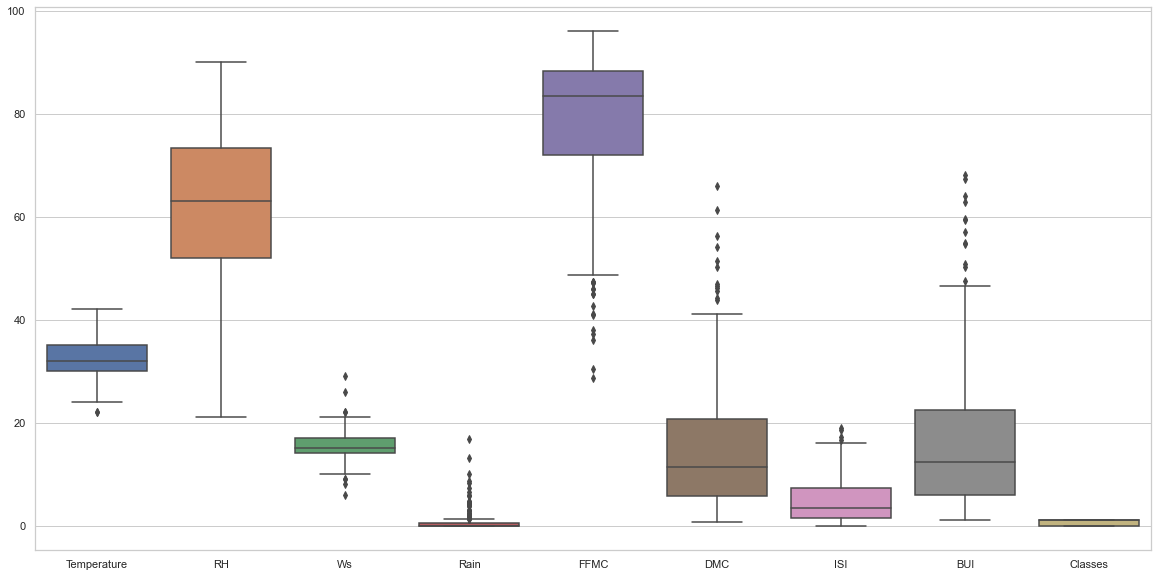

In [43]:
sns.boxplot(data = new_df)

In [44]:
new_df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,29,57,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,bejaia
1,29,61,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,bejaia
2,26,82,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,bejaia
3,25,89,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0,0,bejaia
4,27,77,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,bejaia
...,...,...,...,...,...,...,...,...,...,...,...,...
239,30,65,14.0,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,Sidi-Bel Abbes
240,28,87,15.0,4.4,41.1,6.5,8,0.1,6.2,0,0,Sidi-Bel Abbes
241,27,87,29.0,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,Sidi-Bel Abbes
242,24,54,18.0,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,Sidi-Bel Abbes


## How is the temperature in two different classes

* fire class have more temperature

## How rain impact on fire

<AxesSubplot:xlabel='Classes', ylabel='Rain'>

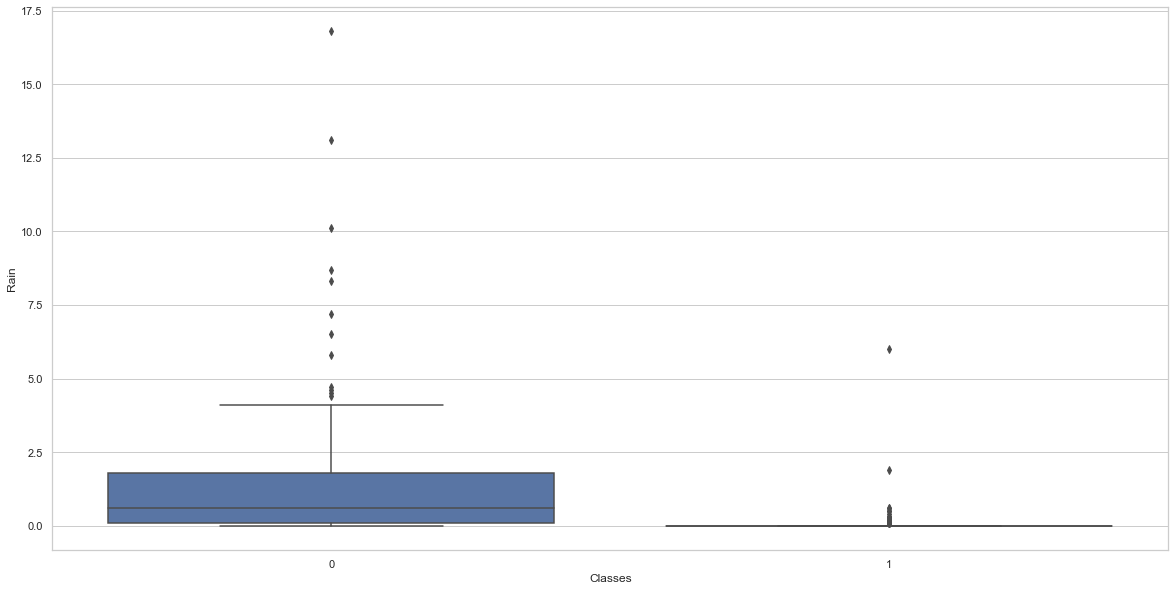

In [46]:
sns.set(style='whitegrid')
sns.boxplot(x='Classes',y='Rain',data=new_df)

In not fire class rain is very often 

# <span style="color:green">Checking the distributions with target variable<span>

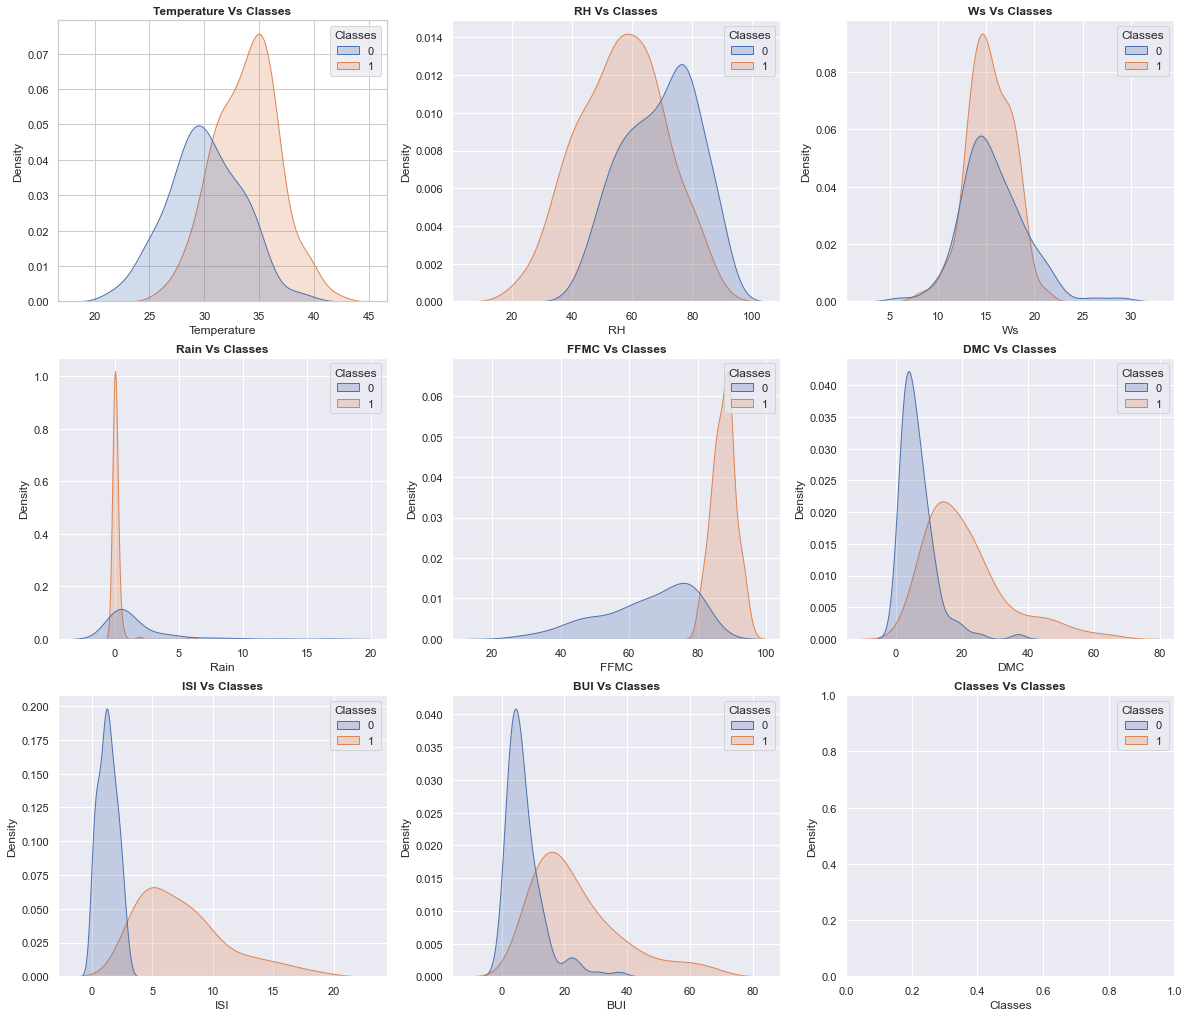

In [47]:
plt.figure(figsize=(20,30))
for i in enumerate(numeric_features):
    plt.subplot(5,3, i[0]+1)
    sns.set(rc={'figure.figsize':(10,10)})
    sns.kdeplot(data=new_df, x=i[1],shade=True ,color='Green', hue='Classes')
    plt.title("{} Vs Classes".format(i[1]),fontweight="bold")


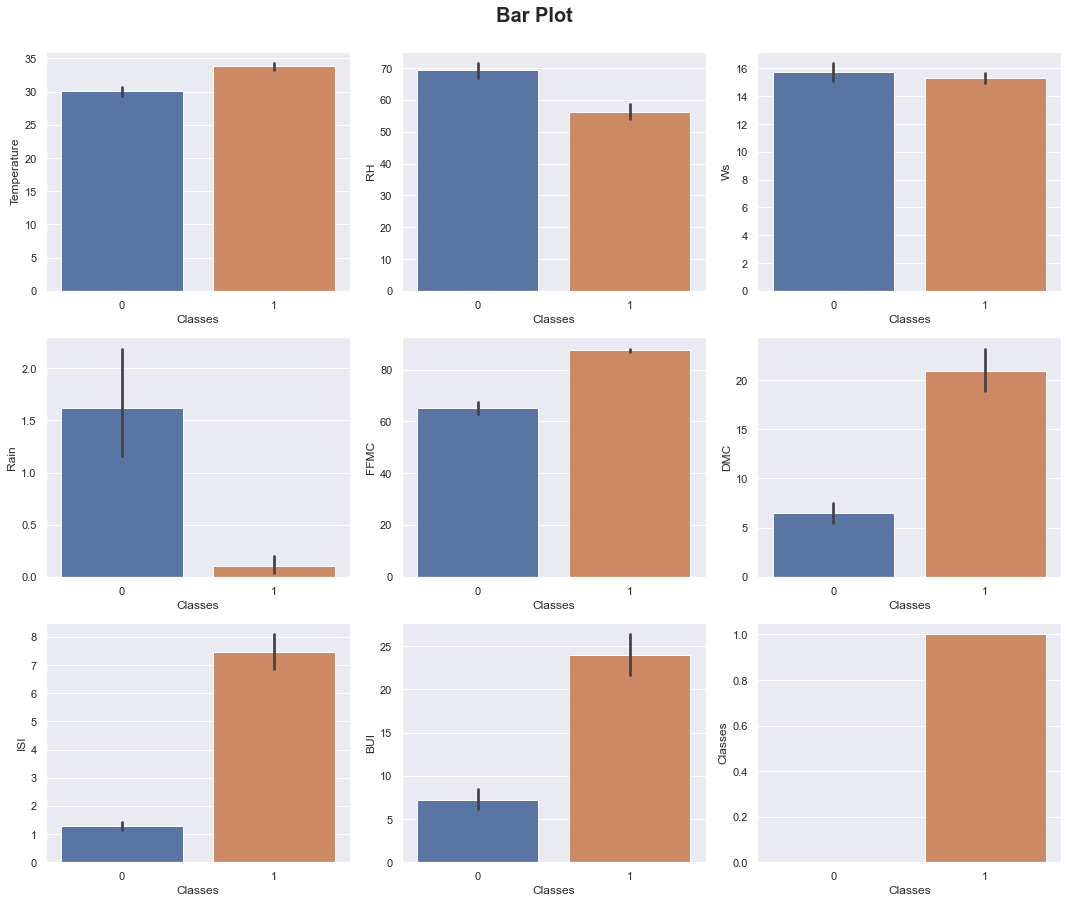

In [48]:
plt.figure(figsize=(15, 20))
plt.suptitle('Bar Plot', fontsize=20, fontweight='bold', alpha=1, y=1)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.barplot(y=numeric_features[i], x='Classes', data=df)
    plt.tight_layout()

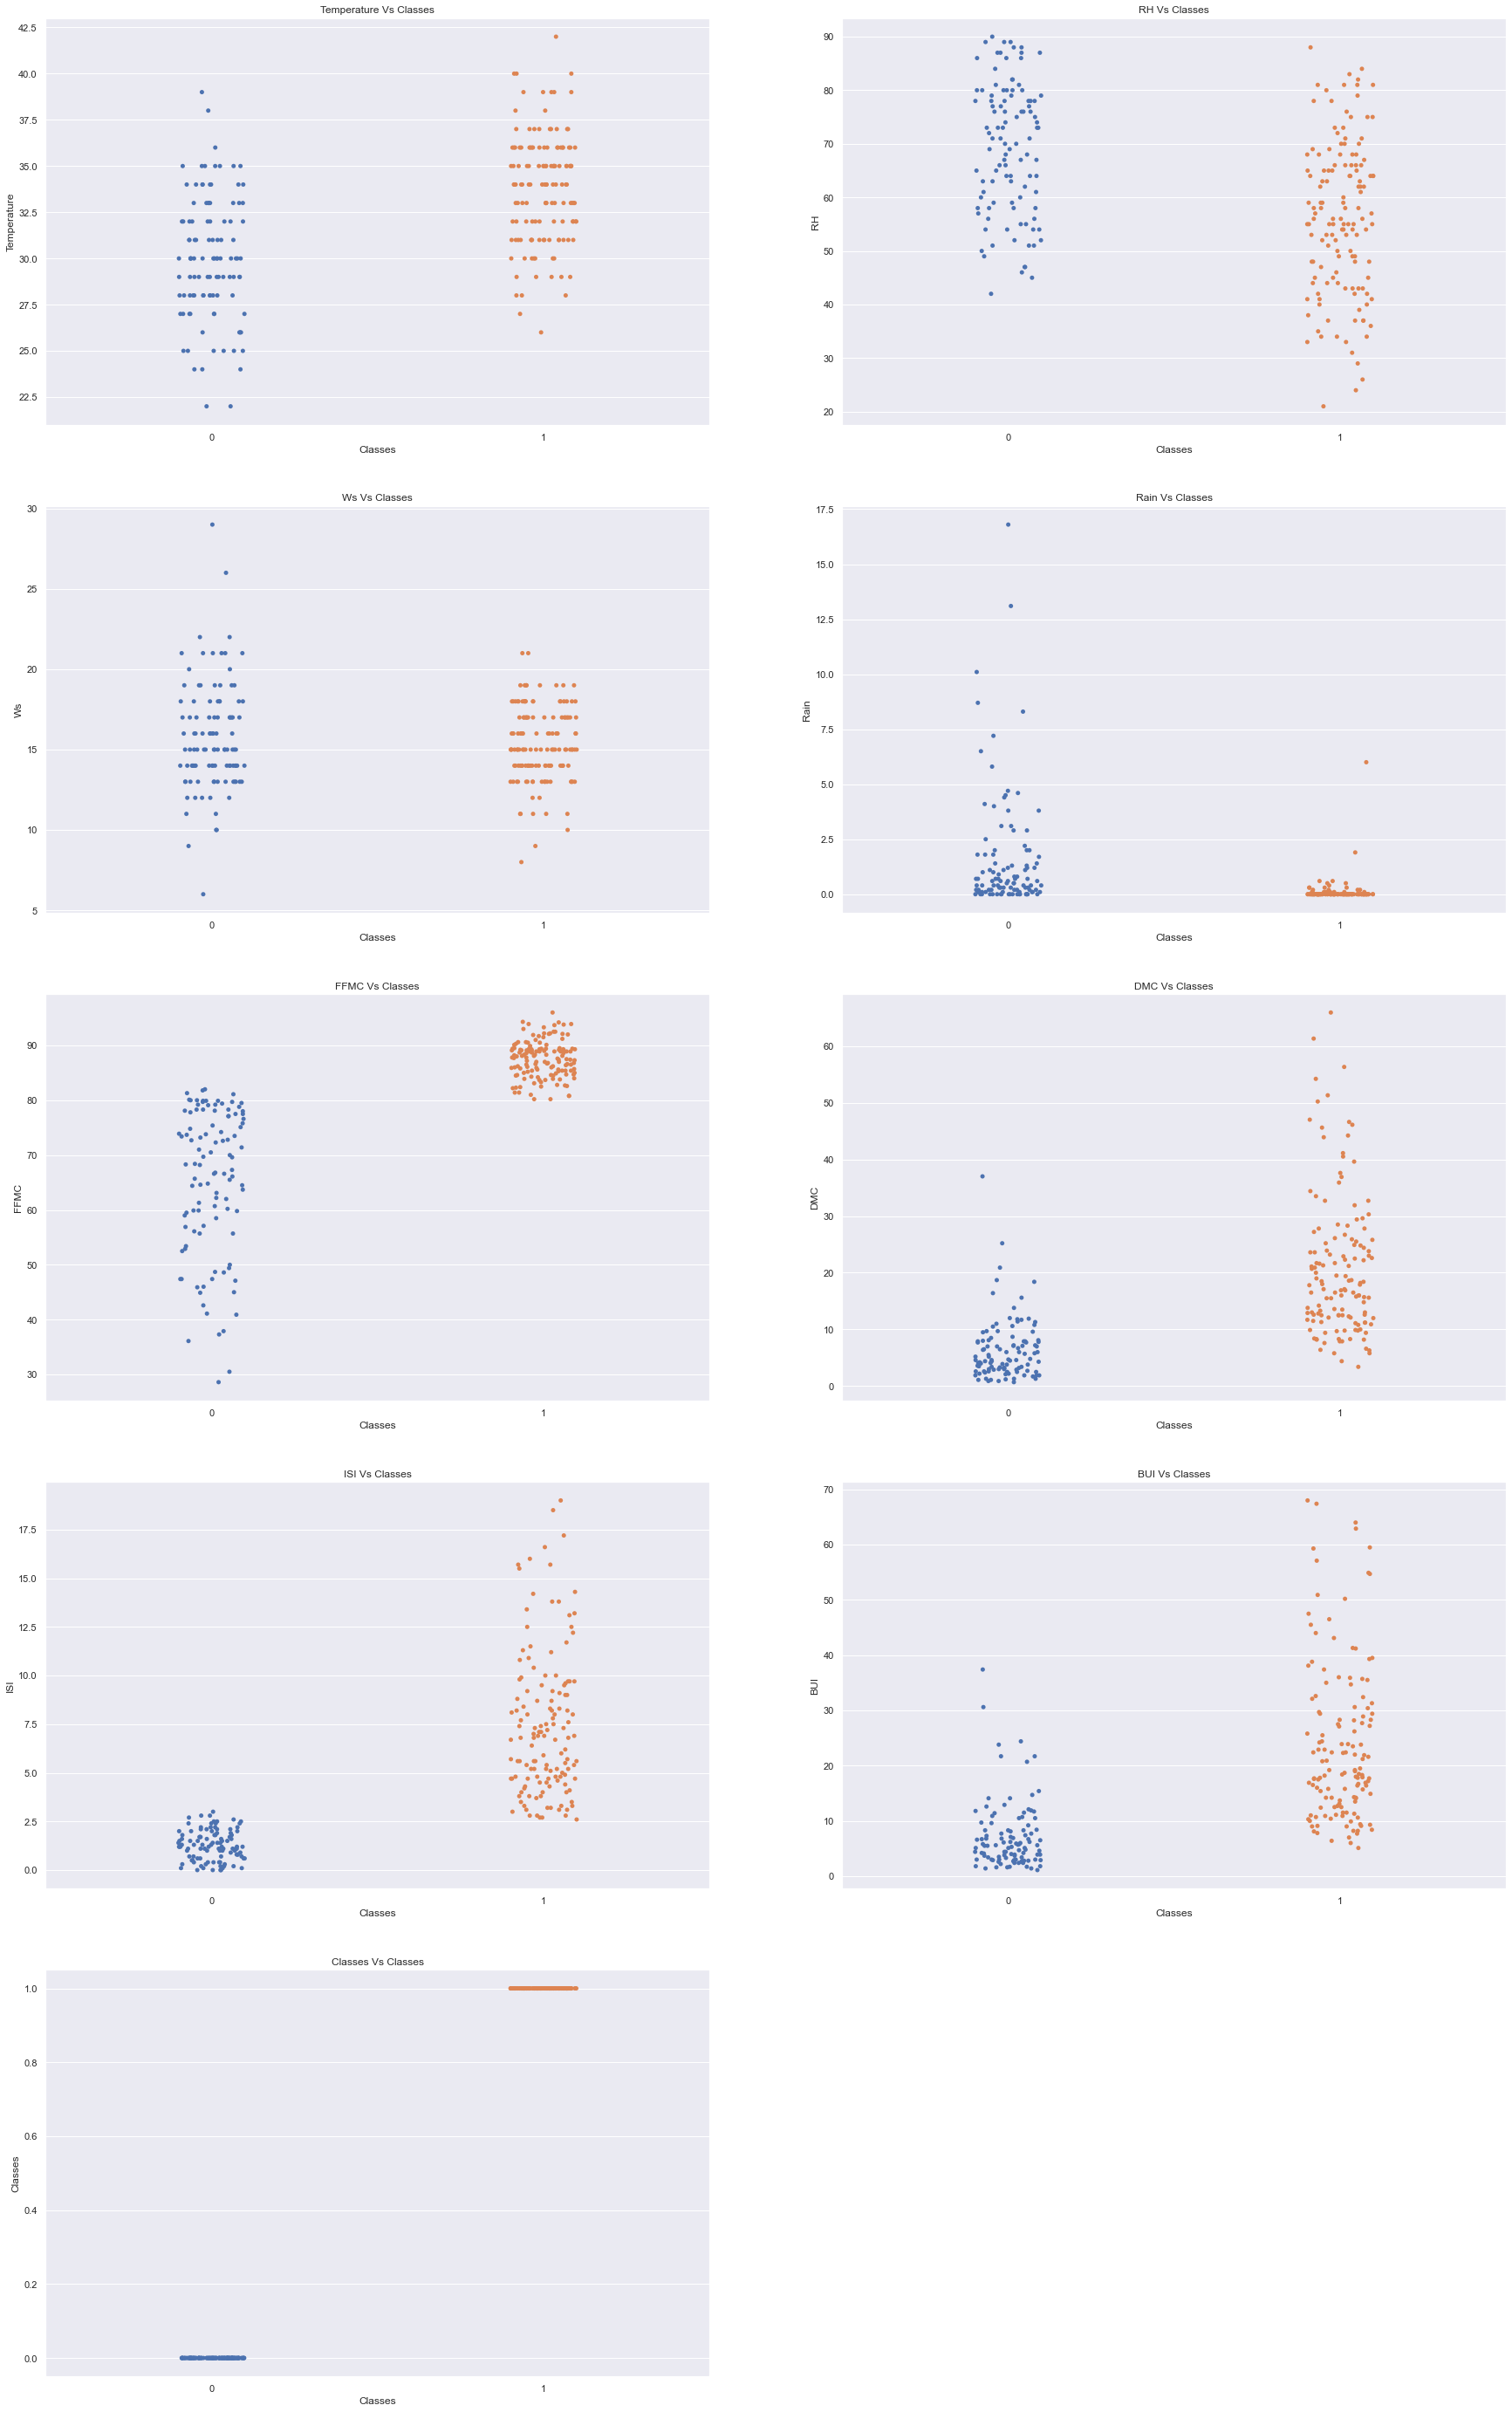

In [49]:
plt.figure(figsize=(30,60))
for i in enumerate(numeric_features):
    plt.subplot(6, 2, i[0]+1)
    sns.set(rc={'figure.figsize':(7,7)})
    sns.stripplot(data=new_df, y=i[1], x='Classes')
    plt.title("{} Vs Classes".format(i[1]))

In [50]:
new_df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,29,57,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,bejaia
1,29,61,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,bejaia
2,26,82,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,bejaia
3,25,89,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0,0,bejaia
4,27,77,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,bejaia
...,...,...,...,...,...,...,...,...,...,...,...,...
239,30,65,14.0,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,Sidi-Bel Abbes
240,28,87,15.0,4.4,41.1,6.5,8,0.1,6.2,0,0,Sidi-Bel Abbes
241,27,87,29.0,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,Sidi-Bel Abbes
242,24,54,18.0,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,Sidi-Bel Abbes


### <span style="color:Cyan">Encoding feature

In [51]:
LabelEncoder=LabelEncoder()

In [52]:
new_df['region']=LabelEncoder.fit_transform(new_df['region'])

In [53]:
new_df.dtypes

Temperature      int32
RH               int32
Ws             float64
Rain           float64
FFMC           float64
DMC            float64
DC              object
ISI            float64
BUI            float64
FWI             object
Classes          int64
region           int32
dtype: object

### <span style="color:Cyan">Extract Input and output Variables<span>

In [54]:
X = new_df.drop(columns = ['Classes','DC','FWI'])
y = new_df['Classes']

In [55]:
X

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,BUI,region
0,29,57,18.0,0.0,65.7,3.4,1.3,3.4,1
1,29,61,13.0,1.3,64.4,4.1,1.0,3.9,1
2,26,82,22.0,13.1,47.1,2.5,0.3,2.7,1
3,25,89,13.0,2.5,28.6,1.3,0.0,1.7,1
4,27,77,16.0,0.0,64.8,3.0,1.2,3.9,1
...,...,...,...,...,...,...,...,...,...
239,30,65,14.0,0.0,85.4,16.0,4.5,16.9,0
240,28,87,15.0,4.4,41.1,6.5,0.1,6.2,0
241,27,87,29.0,0.5,45.9,3.5,0.4,3.4,0
242,24,54,18.0,0.1,79.7,4.3,1.7,5.1,0


In [56]:
y

0      0
1      0
2      0
3      0
4      0
      ..
239    1
240    0
241    0
242    0
243    0
Name: Classes, Length: 244, dtype: int64

# <span style="color:maroon">Train_test split<span>

In [86]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [87]:
X_train

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,BUI,region
59,31,79,15.0,0.0,85.4,28.5,4.7,37.4,1
102,30,77,21.0,1.8,58.5,1.9,1.1,2.4,1
147,36,62,16.0,0.0,87.8,16.5,7.0,16.4,0
223,29,74,15.0,1.1,59.5,4.7,0.8,4.6,0
88,34,64,16.0,0.0,89.4,50.2,7.3,62.9,1
...,...,...,...,...,...,...,...,...,...
137,29,87,15.0,0.4,47.4,4.2,0.2,4.1,0
72,35,51,13.0,0.3,81.3,15.6,2.5,20.7,1
140,32,67,14.0,4.5,64.6,4.4,1.0,4.2,0
235,33,64,13.0,0.0,88.9,26.1,7.1,32.4,0


In [88]:
X_test

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,BUI,region
67,32,69,16.0,0.0,86.5,15.5,5.5,17.2,1
243,24,64,15.0,0.2,67.3,3.8,1.2,4.8,0
206,35,38,15.0,0.0,92.1,51.3,12.2,54.9,0
122,32,71,12.0,0.7,57.1,2.5,0.6,2.8,1
89,35,48,18.0,0.0,90.1,54.2,12.5,67.4,1
...,...,...,...,...,...,...,...,...,...
158,38,43,13.0,0.5,85.0,13.0,4.1,13.7,0
99,30,73,17.0,0.9,62.0,2.6,1.1,3.0,1
173,32,48,18.0,0.0,91.5,44.2,13.2,44.0,0
176,39,64,9.0,1.2,73.8,11.7,1.1,11.4,0


In [89]:
y_train

59     1
102    0
147    1
223    0
88     1
      ..
137    0
72     0
140    0
235    1
37     1
Name: Classes, Length: 170, dtype: int64

In [90]:
y_test

67     1
243    0
206    1
122    0
89     1
      ..
158    1
99     0
173    1
176    0
95     0
Name: Classes, Length: 74, dtype: int64

In [91]:
X_train.dtypes

Temperature      int32
RH               int32
Ws             float64
Rain           float64
FFMC           float64
DMC            float64
ISI            float64
BUI            float64
region           int32
dtype: object

### <span style="color:Cyan">Plotting the distplots without any transformation

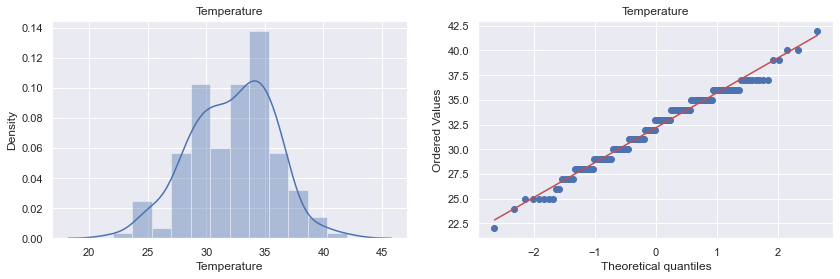

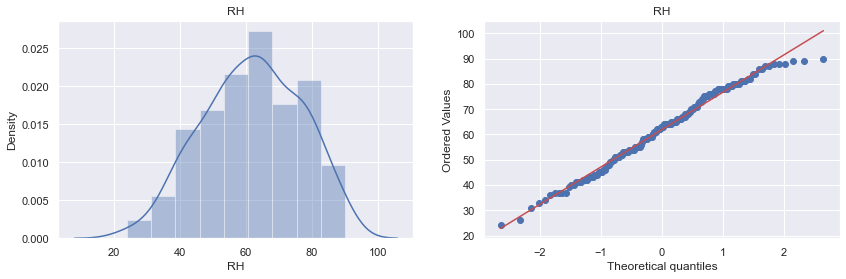

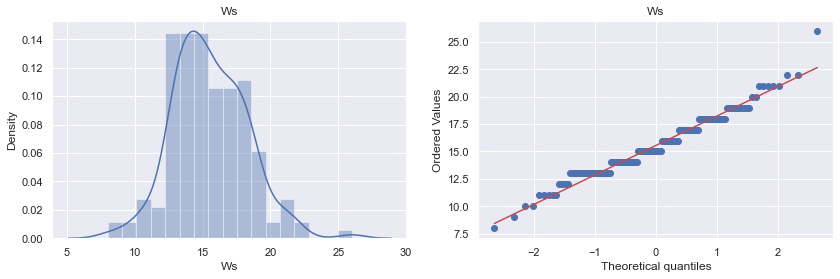

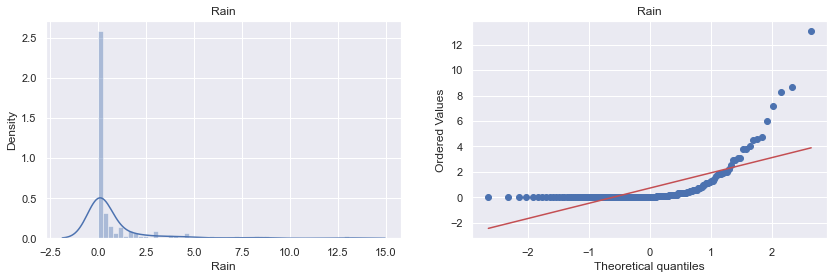

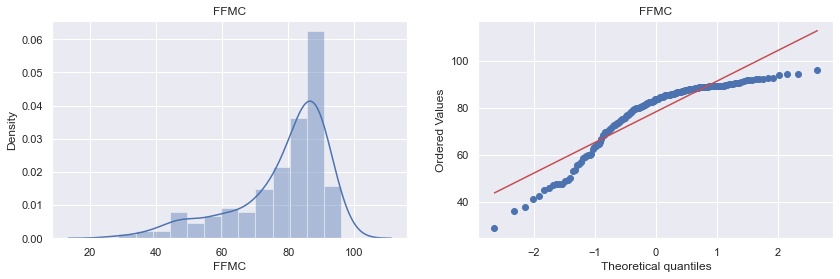

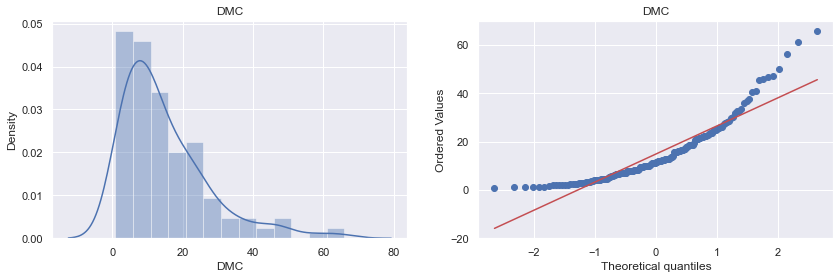

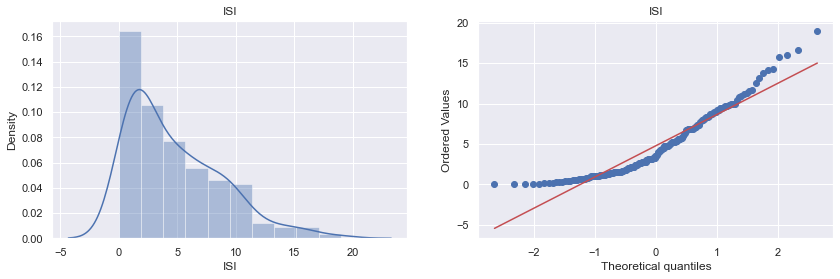

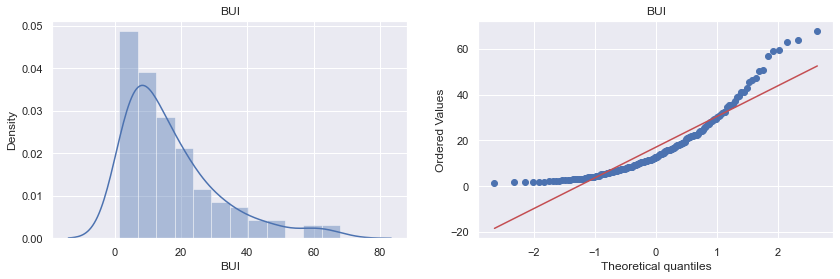

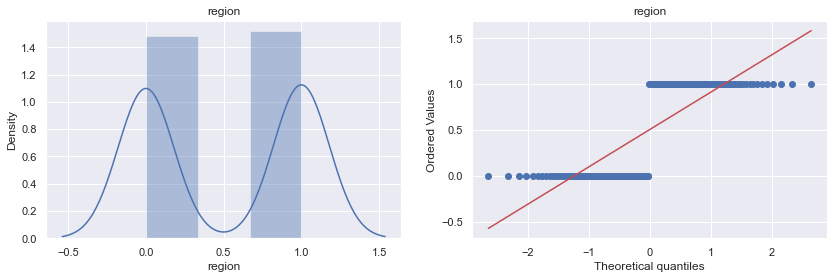

In [92]:
for col in X_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title(col)

    plt.subplot(122)
    stats.probplot(X_train[col], dist="norm", plot=plt)
    plt.title(col)

    plt.show()

In [93]:
from sklearn.preprocessing import PowerTransformer

### <span style="color:Cyan">Apply Yeo-Johnson transform

In [94]:


pt1 = PowerTransformer()

X_train_transformed2 = pt1.fit_transform(X_train)
X_test_transformed2 = pt1.transform(X_test)


In [95]:
X_train_transformed2 = pd.DataFrame(X_train_transformed2,columns=X_train.columns)

In [96]:
pd.DataFrame({'cols':X_train.columns,'Yeo_Johnson_lambdas':pt1.lambdas_})

,cols,Yeo_Johnson_lambdas
0,Temperature,1.655189
1,RH,1.190225
2,Ws,0.433320
3,Rain,-2.382442
4,FFMC,4.277112
5,DMC,0.105105
6,ISI,0.108344
7,BUI,0.069282
8,region,0.101846


### <span style="color:Cyan">Before and after comparision for Yeo-Johnson for Distplot

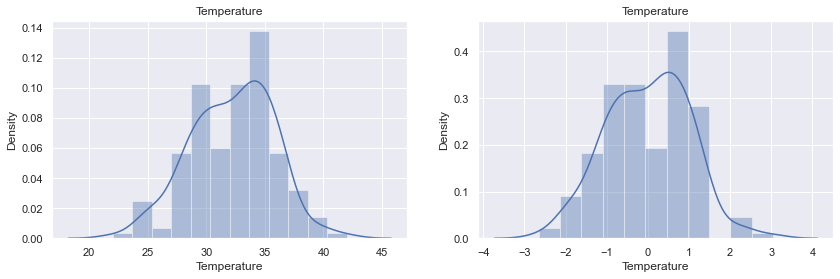

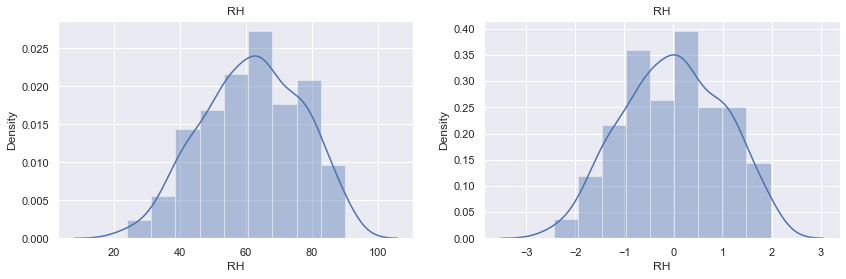

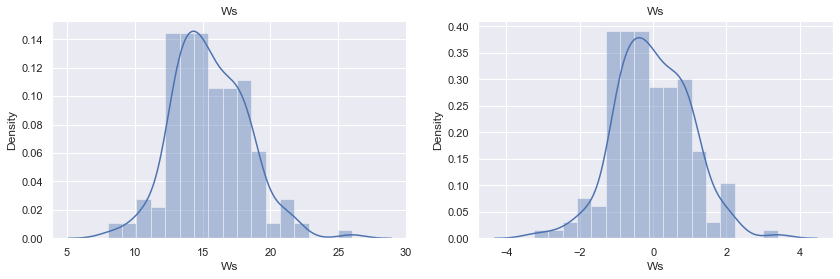

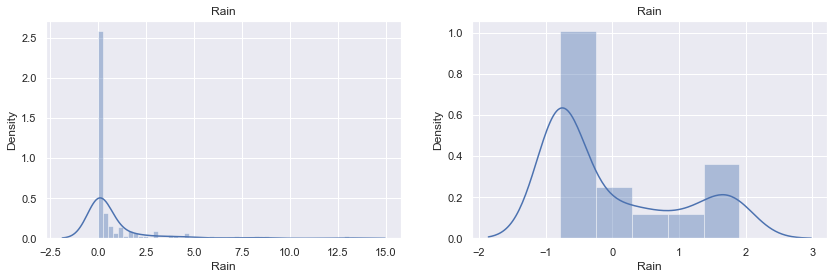

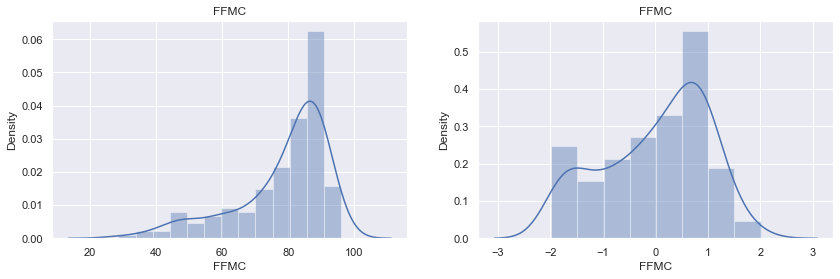

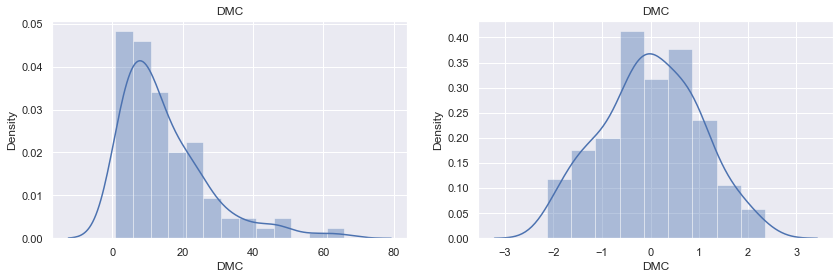

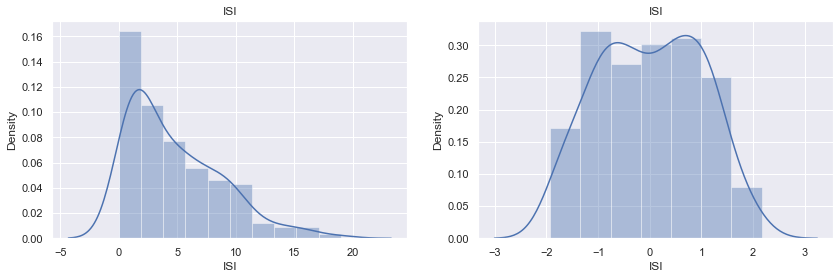

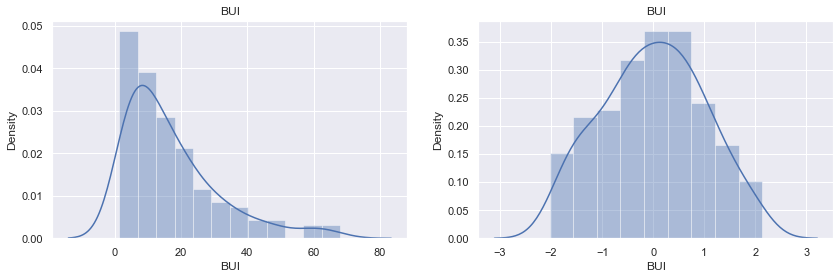

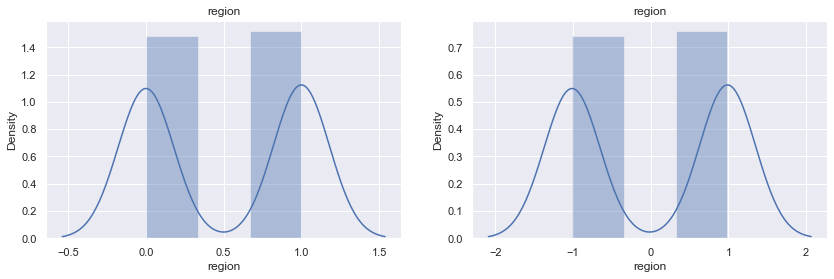

In [97]:
for col in X_train_transformed2.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title(col)

    plt.subplot(122)
    sns.distplot(X_train_transformed2[col])
    plt.title(col)

    plt.show()

### <span style="color:Cyan">Before and after comparision for Yeo-Johnson for Q-Q Plot

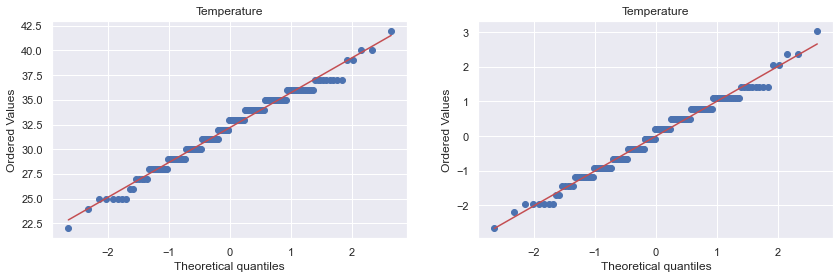

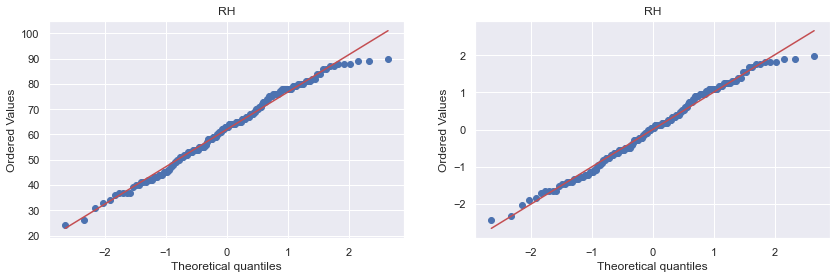

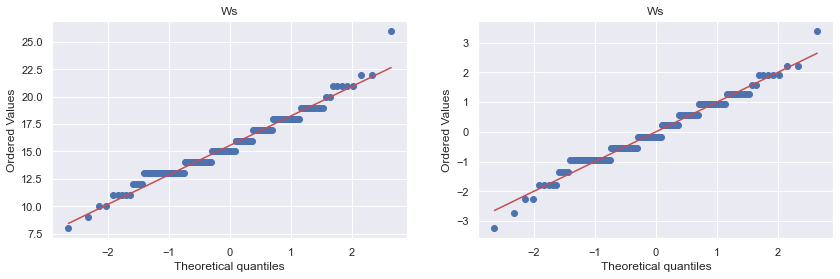

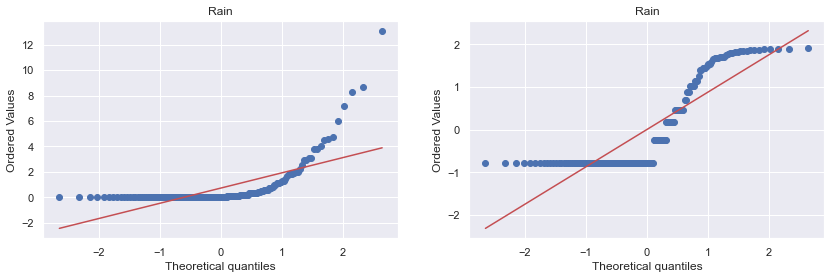

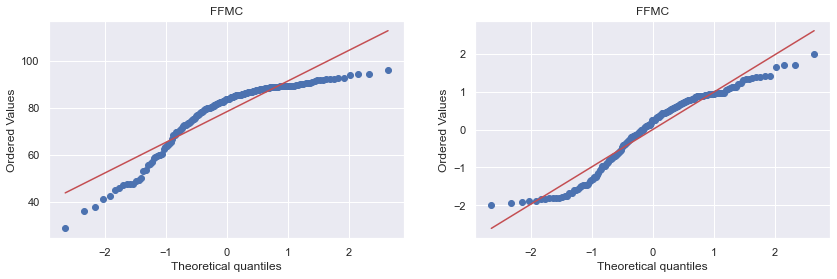

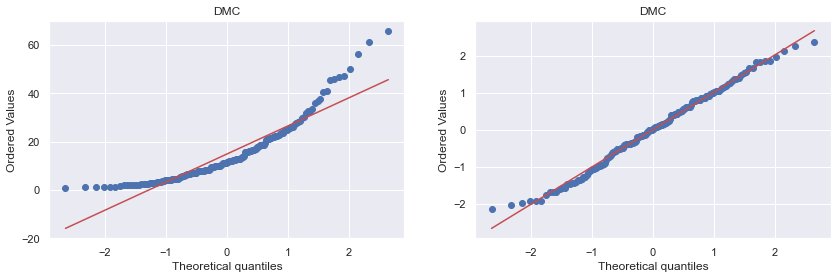

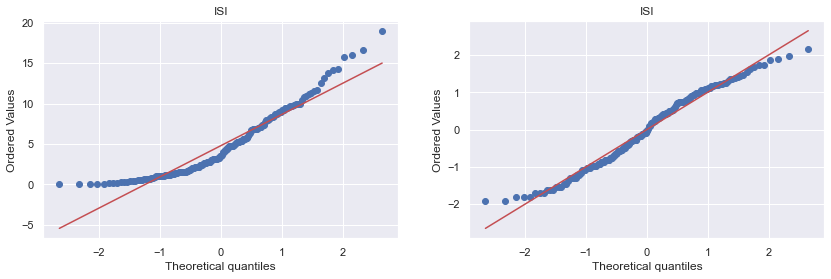

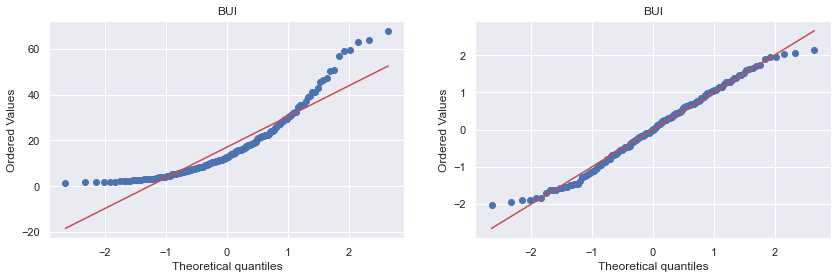

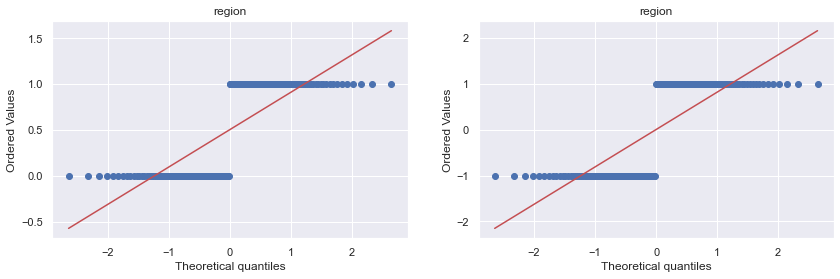

In [126]:
for col in X_train_transformed2.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    stats.probplot(X_train[col],dist="norm", plot=plt)
    plt.title(col)

    plt.subplot(122)
    stats.probplot(X_train_transformed2[col],dist="norm", plot=plt)
    plt.title(col)

    plt.show()

# <span style="color:seagreen">Model Building

### <span style="color:cyan">Logistic Regression

In [107]:
clf1 = LogisticRegression()

In [108]:
clf1.fit(X_train,y_train)

LogisticRegression()

In [131]:
X_train

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,BUI,region
59,31,79,15.0,0.0,85.4,28.5,4.7,37.4,1
102,30,77,21.0,1.8,58.5,1.9,1.1,2.4,1
147,36,62,16.0,0.0,87.8,16.5,7.0,16.4,0
223,29,74,15.0,1.1,59.5,4.7,0.8,4.6,0
88,34,64,16.0,0.0,89.4,50.2,7.3,62.9,1
...,...,...,...,...,...,...,...,...,...
137,29,87,15.0,0.4,47.4,4.2,0.2,4.1,0
72,35,51,13.0,0.3,81.3,15.6,2.5,20.7,1
140,32,67,14.0,4.5,64.6,4.4,1.0,4.2,0
235,33,64,13.0,0.0,88.9,26.1,7.1,32.4,0


In [132]:
y_train

59     1
102    0
147    1
223    0
88     1
      ..
137    0
72     0
140    0
235    1
37     1
Name: Classes, Length: 170, dtype: int64

In [133]:
y_pred1 = clf1.predict(X_test)
y_pred1

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0], dtype=int64)

# <span style="color:seagreen">Performance Matrix

### <span style="color:Cyan">Accuracy

In [110]:
print("Accuracy of Logistic Regression",accuracy_score(y_pred1,y_test))

Accuracy of Logistic Regression 0.972972972972973


### <span style="color:Cyan">Confusion Matrix

In [127]:
confusion_matrix(y_test,y_pred1)

array([[35,  2],
       [ 0, 37]], dtype=int64)

In [128]:
print("Logistic Regression Confusion Matrix\n")
pd.DataFrame(confusion_matrix(y_test,y_pred1))

Logistic Regression Confusion Matrix



,0,1
0,35,2
1,0,37


## <span style="color:Cyan">Precision

In [121]:
print(precision_score(y_test,y_pred1,average=None))

[1.         0.94871795]


## <span style="color:Cyan">Recall

In [115]:
print(recall_score(y_test,y_pred1,average=None))

array([0.94594595, 1.        ])

### <span style="color:Cyan">F1 Score

In [120]:
print(f1_score(y_test,y_pred1,average=None))

[0.97222222 0.97368421]


### <span style="color:Cyan">Classification Report

In [130]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        37
           1       0.95      1.00      0.97        37

    accuracy                           0.97        74
   macro avg       0.97      0.97      0.97        74
weighted avg       0.97      0.97      0.97        74



In [118]:
print("For Logistic regression Model")
print("-"*50)
cdf = pd.DataFrame(confusion_matrix(y_test,y_pred1),columns=list(range(0,2)))
print(cdf)
print("-"*50)
print("Precision - ",precision_score(y_test,y_pred1))
print("Recall - ",recall_score(y_test,y_pred1))
print("F1 score - ",f1_score(y_test,y_pred1))

For Logistic regression Model
--------------------------------------------------
    0   1
0  35   2
1   0  37
--------------------------------------------------
Precision -  0.9487179487179487
Recall -  1.0
F1 score -  0.9736842105263158
